In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

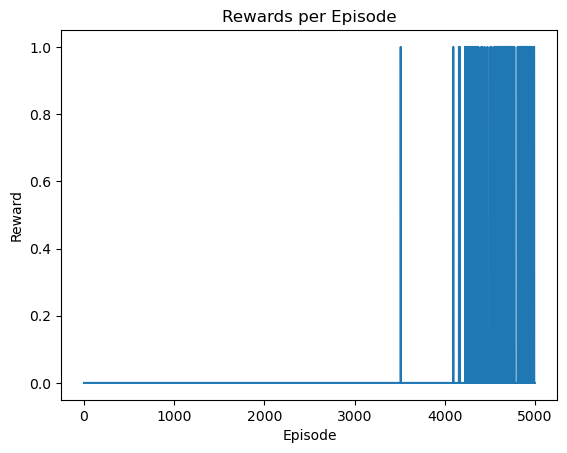

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize environment
env = gym.make('FrozenLake-v1')

# Set parameters
alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.1 # exploration rate
num_episodes = 5000

# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Initialize list to store rewards per episode
rewards_list = []

# Run Q-learning algorithm
for i in range(num_episodes):
    # Reset environment
    state = env.reset()
    done = False
    episode_reward = 0
    
    while not done:
        # Epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])
        
        # Take action and observe new state and reward
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-value using TD target
        Q[state, action] = Q[state, action] + alpha * (reward + gamma*np.max(Q[new_state, :]) - Q[state, action])
        
        state = new_state
        episode_reward += reward
        
    rewards_list.append(episode_reward)

# Plot rewards per episode
plt.plot(rewards_list)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode')
plt.show()
